## Fixed-point Iterations

In Fiexed point iterations, we pick an initial point $p_0$ and successively apply $g$ to generate a sequence $p_{n+1} = g(p_n)$. Under appropriate conditions, e.g., $g:[a,b] \rightarrow [a,b]$ continuous with $|g^{\prime}(x)| \leq k < 1$, the iterations converge to a fixed-point of $g$ ($g(p) = p$).

In [5]:
def fixed_point(p0, e, max_it, g):
    i = 1
    while i <= max_it:
        try:
            p = g(p0)
        except:
            print('Arithmetic error')
        if abs(p - p0) <= e:
            return(p)
        i = i + 1
        p0 = p
    
    print('max number of iteration exceeded')
    return(-999)

#def g(x):
#    y = x - (x ** 3 + 4 * x ** 2 - 10)/(3 * x ** 2 + 8 * x)
#    return y

g = lambda x: x - (x ** 3 + 4 * x ** 2 - 10)/(3 * x ** 2 + 8 * x)
p0 = 1.5
e = 0.0001
max_it = 10

p = fixed_point(p0, e, max_it, g)
print("P = {:.15f}, \ng(p) = {:.15f}".format(p, g(p)))


P = 1.365230013916147, 
g(p) = 1.365230013414097


[1.5        1.37333333 1.36526201 1.36523001 1.36523001 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


/var/folders/x8/8v73_ng56dgc13wzsjrxtzz00000gs/T/ipykernel_50849/1841755139.py:20: RuntimeWarning: divide by zero encountered in divide
  y = x - (x ** 3 + 4 * x ** 2 - 10)/(3 * x ** 2 + 8 * x)


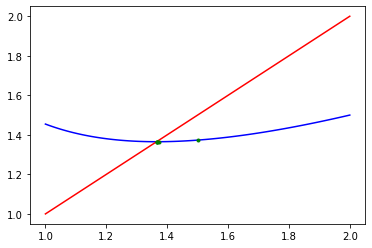

In [6]:
%matplotlib inline 
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

def fixed_point_array(p0, e, max_it, g):
    p = np.zeros(max_it)
    p[0] = p0
    i = 1
    while i <= max_it:
        p[i] = g(p[i-1])
        if abs(p[i] - p[i-1]) <= e:
            return(p)
        i = i + 1
        
    print('max number of iteration exceeded')
    return(-999)

def g1(x):
    y = x - (x ** 3 + 4 * x ** 2 - 10)/(3 * x ** 2 + 8 * x)
    return y

def g2(x):
    y = x - (x ** 3 + 4 * x ** 2 - 10)
    return y

p0 = 1.5
e = 1e-8
max_it = 100

p = fixed_point_array(p0, e, max_it, g1)
print(p)

x = np.linspace(1, 2, 100)
gx = g1(x)

fig, ax = plt.subplots()

ax.plot(x, gx, color = 'blue')
ax.plot(x,x, color = 'red')
ax.plot(p, g1(p), 'g.')

## Experiment with convergence
There are multiple ways to convert a root problem $f(x) = 0$ to a fixed-point problems $g(p) = p$. The main question is: How can we find a fixed-point problem that produces a sequence that reliably converges to a solution?

**Example:** $f(x) = x^3 + 4x^2 - 10$ has a root in $[1,2]$.  Convert this to a fixed point problem and examine the convergence.

1. $g_1(x) = x - (x^3 + 4x^2 - 10)$.
1. $g_2(x) = \sqrt{10/x - 4x}$.
1. $g_3(x) = 1/2 \sqrt{10 - x^3}$.
1. $g_4(x) = \sqrt{\dfrac{10}{4+x}}$.
1. $g_5(x) = x - \dfrac{x^3 + 4x^2 - 10}{3x^2 + 8x}$.

In [7]:
import numpy as np
import pandas as pd

def fixed_point(p0, e, max_it, g):
    p = np.zeros(max_it)
    p[0] = p0
    i = 1
    while i < max_it:
        try:
            p[i] = g(p[i-1])
        except:
            print('Arithmetic error')
            return(p)
        if abs(p[i] - p[i-1]) <= e:
            return(p)

        i += 1
    
    print('max number of iteration exceeded')
    return(p)

def newton_bisection(a, b, e, max_it, f):
    FA = f(a)
    i = 0
    p = np.zeros(max_it)  
    while i < max_it:
        p[i] = (a + b) / 2
        FP = f(p[i])
        if (abs(b - a) <= e/2):
            return p
        if FA * FP < 0:
            b = p[i]
        else:
            a = p[i]
            FA = FP    
        i += 1
    return(p)
    print('Warning. Max Iter Reached!')


def f(x):
    y = x**3 + 4 * x**2 - 10
    return y

def g1(x):
    y = x - (x**3 + 4 * x**2 - 10)
    return y

def g2(x):
    y = np.sqrt(10/x - 4 * x)
    return y

def g3(x):
    y = (1/2) * np.sqrt(10 - x**3)
    return y

def g4(x):
    y = np.sqrt(10/(4+x))
    return y

def g5(x):
    y = x - (x**3 + 4 * x**2 - 10)/(3 * x**2 + 8 * x)
    return y

In [8]:
p0 = 1.35
max_it = 30
e = 1e-8
a = 1
b = 2

p1 = fixed_point(p0, e, max_it, g1)
p2 = fixed_point(p0, e, max_it, g2)
p3 = fixed_point(p0, e, max_it, g3)
p4 = fixed_point(p0, e, max_it, g4)
p5 = fixed_point(p0, e, max_it, g5)
pn = newton_bisection(a, b, e, max_it, f)

max number of iteration exceeded
max number of iteration exceeded


/var/folders/x8/8v73_ng56dgc13wzsjrxtzz00000gs/T/ipykernel_50849/1124200285.py:46: RuntimeWarning: overflow encountered in double_scalars
  y = x - (x**3 + 4 * x**2 - 10)
/var/folders/x8/8v73_ng56dgc13wzsjrxtzz00000gs/T/ipykernel_50849/1124200285.py:46: RuntimeWarning: invalid value encountered in double_scalars
  y = x - (x**3 + 4 * x**2 - 10)
/var/folders/x8/8v73_ng56dgc13wzsjrxtzz00000gs/T/ipykernel_50849/1124200285.py:50: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(10/x - 4 * x)


In [9]:
np.array([p1,p2,p3,p4,p5,pn]).reshape(6,max_it).transpose()

array([[ 1.35000000e+000,  1.35000000e+000,  1.35000000e+000,
         1.35000000e+000,  1.35000000e+000,  1.50000000e+000],
       [ 1.59962500e+000,  1.41683006e+000,  1.37291888e+000,
         1.36717185e+000,  1.36534501e+000,  1.25000000e+000],
       [-2.72869624e+000,  1.17927490e+000,  1.36126564e+000,
         1.36498302e+000,  1.36523002e+000,  1.37500000e+000],
       [-2.19454838e+000,  1.93976480e+000,  1.36725223e+000,
         1.36526144e+000,  1.36523001e+000,  1.31250000e+000],
       [-8.89680277e-001,              nan,  1.36419279e+000,
         1.36522602e+000,  0.00000000e+000,  1.34375000e+000],
       [ 6.64840526e+000,              nan,  1.36576053e+000,
         1.36523052e+000,  0.00000000e+000,  1.35937500e+000],
       [-4.54024870e+002,              nan,  1.36495828e+000,
         1.36522995e+000,  0.00000000e+000,  1.36718750e+000],
       [ 9.27670450e+007,              nan,  1.36536910e+000,
         1.36523002e+000,  0.00000000e+000,  1.36328125e+000],


In [10]:
pd.DataFrame(np.array([p1,p2,p3,p4,p5,pn]).reshape(6,max_it).transpose(),  columns = ['g1', 'g2', 'g3', 'g4', 'g5', 'gn'])

,g1,g2,g3,g4,g5,gn
0,1.350000e+00,1.350000,1.350000,1.350000,1.350000,1.500000
1,1.599625e+00,1.416830,1.372919,1.367172,1.365345,1.250000
2,-2.728696e+00,1.179275,1.361266,1.364983,1.365230,1.375000
3,-2.194548e+00,1.939765,1.367252,1.365261,1.365230,1.312500
4,-8.896803e-01,NaN,1.364193,1.365226,0.000000,1.343750
5,6.648405e+00,NaN,1.365761,1.365231,0.000000,1.359375
6,-4.540249e+02,NaN,1.364958,1.365230,0.000000,1.367188
7,9.276704e+07,NaN,1.365369,1.365230,0.000000,1.363281
8,-7.983277e+23,NaN,1.365159,1.365230,0.000000,1.365234
9,5.087958e+71,NaN,1.365266,0.000000,0.000000,1.364258


In [11]:
## Using a Pandas data frame, we can look at the convergence.
all_ps = {'p1':p1, 'p2':p2, 'p3':p3, 'p4':p4, 'p5':p5, 'pn':pn}
#print(all_ps)

pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_ps.items()]))

,p1,p2,p3,p4,p5,pn
0,1.350000e+00,1.350000,1.350000,1.350000,1.350000,1.500000
1,1.599625e+00,1.416830,1.372919,1.367172,1.365345,1.250000
2,-2.728696e+00,1.179275,1.361266,1.364983,1.365230,1.375000
3,-2.194548e+00,1.939765,1.367252,1.365261,1.365230,1.312500
4,-8.896803e-01,NaN,1.364193,1.365226,0.000000,1.343750
5,6.648405e+00,NaN,1.365761,1.365231,0.000000,1.359375
6,-4.540249e+02,NaN,1.364958,1.365230,0.000000,1.367188
7,9.276704e+07,NaN,1.365369,1.365230,0.000000,1.363281
8,-7.983277e+23,NaN,1.365159,1.365230,0.000000,1.365234
9,5.087958e+71,NaN,1.365266,0.000000,0.000000,1.364258


In [12]:
## Testing Newton's method
def g1(x):
    y = np.cos(x)
    return y

def g2(x):
    y = x + (np.cos(x) - x)/(np.sin(x) + 1)
    return y

p0 = np.pi / 4

max_it = 10
e = 1e-8


p1 = fixed_point(p0, e, max_it, g1)
p2 = fixed_point(p0, e, max_it, g2)

all_ps = {'p1':p1, 'p2':p2}
D = pd.DataFrame(dict([(k,pd.Series(v)) for k, v in all_ps.items()]))
pd.options.display.float_format = '{:,.15f}'.format
print(D)

max number of iteration exceeded
                 p1                p2
0 0.785398163397448 0.785398163397448
1 0.707106781186548 0.739536133515238
2 0.760244597075630 0.739085178106010
3 0.724667480889126 0.739085133215161
4 0.748719885789484 0.739085133215161
5 0.732560844592242 0.000000000000000
6 0.743464211315294 0.000000000000000
7 0.736128256500852 0.000000000000000
8 0.741073687083710 0.000000000000000
9 0.737744158992575 0.000000000000000


In [13]:
import numpy as np
import pandas as pd

def fixed_point(p0, e, max_it, g):
    p = []
    p.append(p0)
    i = 1
    while i <= max_it:
        try:
            p.append(g(p0))
        except:
            print('Arithmetic error')
            return(p)
        if abs(p[i] - p0) <= e:
            return(p)
        p0 = p[i]
        i += 1
    
    print('max number of iteration exceeded')
    return(p)


## Multiple roots

